##  Anechoic acoustic recording

**Objectives**: Understand inter-microphone level and time differences. Simulate an anechoic acoustic recording in the short-time Fourier transform (STFT) domain. 

### 1 Theory

#### 1.1 Time-domain anechoic recording

We consider an anechoic stereophonic recording of a source signal $s(t) \in \mathbb{R}$, with time support $\{0,...,T-1\}$. 

The signal captured at microphone $i \in \{1, 2\}$ is given by:

$$x_i(t) = \frac{1}{\sqrt{4 \pi} d_i} s\left(t - \frac{d_i}{c} f_s\right),$$

where $d_i = || \mathbf{q}_{m_i} - \mathbf{q}_s ||_2 $ is the euclidean distance between the source and microphone $i$, $c = 344 $ m/s is the sound velocity and $f_s$ si the sampling rate.

Without loss of generality, we can "absorb" the attenuation and delay parameters at the first microphone into the definition of the source signal. We define the "new" source signal 

$$\tilde{s}(t) = \frac{1}{\sqrt{4 \pi} d_1} s\left(t - \frac{d_1}{c} f_s\right),$$ 

such that

$$ x_1(t) = \tilde{s}(t), \qquad  x_2(t) = a \tilde{s}\left(t  - \delta\right),$$

where 

- $a = d_1/ d_2$ is the inter-microphone level ratio, also called inter-channel level difference (ILD);

- $\displaystyle \delta = \frac{d_2 - d_1}{c} f_s$ is the **time difference of arrival** (TDoA) in samples, also called inter-channel time difference (ITD). 

**ILD and ITD are two important spatial cues for sound source localization**, which can be generalized to recordings in the presence of reverberation (out of the scope of this course). 

In the following, we will omit the tilde notation.

#### 1.2 Frequency-domain anechoic recording

Let $S(f)$ be the discrete Fourier transform (DFT) of $s(t)$, defined for all $f \in \{0,...,F-1\}$ where $F = T/2$ and $T$ is the time-domain support of the signal (we only keep the positive frequencies). It is well known that a delay in time domain is equivalent to phase shift in the frequency domain. We have the following DFT pair:

$$ s(t-\delta) \overset{\text{DFT}}{\longleftrightarrow} \exp\left({-\imath 2 \pi \frac{f \delta}{T}}\right) S(f).$$


Let $S(f,n)$ be the STFT of $s(t)$, defined for all $(f, n) \in \{0,...,F-1\} \times \{0,...,N-1\}$ where $N$ is the number of time frames and $F = L/2 + 1$ with $L$ the size of the analysis window. In the most general case, the following relation however **does not hold**:

\begin{equation*}
s(t-\delta) \overset{\text{STFT}}{\longleftrightarrow} \exp\left({-\imath 2 \pi \frac{f \delta}{L}}\right) S(f, n), \qquad (1)
\label{phase_shift_STFT}
\end{equation*}


Indeed, if the STFT analysis window is 40 ms long and the time delay is several seconds, it is clear that at a given time frame, the STFT of the delayed and original signals are not simply related by a phase shift. However, for **time delays that are small relative to the STFT window length**, we can assume that **this relation holds**. In the following, we will assume that it is the case.

#### 1.3 Phase ambiguity and microphone spacing

The complex exponential $\exp\left({-\imath 2 \pi \frac{f \delta}{L}}\right)$ uniquely specifies the TDoA $\delta$ under the following condition: 

$$\left|2 \pi \frac{f \delta}{L}\right| < \pi, \qquad f\in \{0,1,...,F-1\}.$$ 

otherwise we have an ambiguity due to phase wrap. The maximum value of the TDoA (in samples) is $|\delta_m| = (\ell / c) f_s$ where $\ell$ is the inter-microphone spacing. The maximum value for the frequency index is $F - 1 = L/2$ with $L$ the size of the STFT analysis window. Therefore, the above condition is satisfied if:

$$ \displaystyle \ell < \frac{c}{f_s}.$$

For a sampling rate of 16 kHz, the inter-microphone spacing should be lower than 2.15 cm.

### 2 Practice

Based on the principles that we've just seen, we are going to simulate an anechoic stereophonic recording of a speech signal. 

#### 2.1 Preliminaries

After importing some packages, we first load a monophonic (i.e. single-microphone) speech signal, listen to it and plot its waveform and power spectrogram

In [1]:
import matplotlib
import IPython.display as ipd
import numpy as np
import soundfile as sf 
import matplotlib.pyplot as plt
import scipy as sp
import librosa
import librosa.display
import os
from utils import plot_recording_config

In [2]:
# load wav file

data_path = './data'

s, fs = librosa.load(os.path.join(data_path,'voice_man_1.wav'), sr=None)
T = s.shape[0]

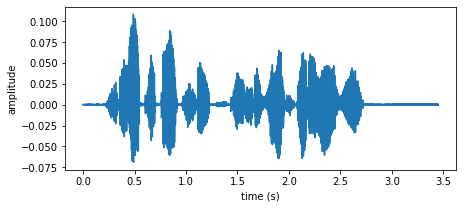

In [3]:
# plot waveform and listen

time_vec = np.arange(T)/fs

plt.figure(figsize=(7,3))
plt.plot(time_vec, s)
plt.xlabel('time (s)')
plt.ylabel('amplitude')

ipd.display(ipd.Audio(s, rate=fs))

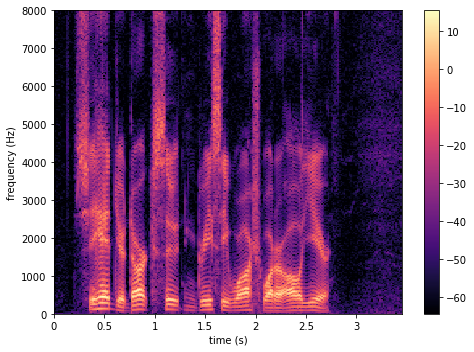

In [4]:
# compute the STFT and plot the power spectrogram

wlen_sec = 32e-3 # STFT window length in seconds
hop_percent = .5 # hop size as a percent of the window length
wlen = int(wlen_sec*fs) # window length in samples
wlen = np.int(np.power(2, np.ceil(np.log2(wlen)))) # next power of 2
F = wlen//2+1 # number of non-redundant frequency bins
hop = np.int(hop_percent*wlen) # hop size in samples
win = np.sin(np.arange(.5,wlen-.5+1)/wlen*np.pi); # sine analysis window

S = librosa.stft(s, n_fft=wlen, hop_length=hop, win_length=wlen, window=win) # STFT of the source signal

plt.figure(figsize=(7,5))
librosa.display.specshow(librosa.power_to_db(np.abs(S)**2), sr=fs, hop_length=hop, x_axis='time', y_axis='hz')

plt.colorbar()

plt.ylabel('frequency (Hz)')
plt.xlabel('time (s)')
plt.tight_layout()

#### 2.2 Recording configuration

We define the recording configuration, i.e. the source and microphone cartesian coordinates (in the horizontal plan).

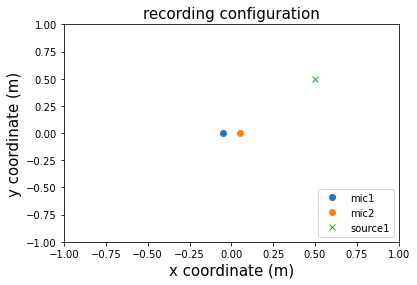

In [5]:
q_m1 = np.array([-5e-2, 0]) # 1st microphone cartesian coordinates
q_m2 = np.array([5e-2, 0]) # 2nd microphone cartesian coordinates
q_s = np.array([0.5, 0.5]) # source cartesian coordinates

plot_recording_config(q_m1, q_m2, q_s)

#### 2.3 Spatial cues computation

We compute the ILD and ITD.

In [6]:
d1 = np.linalg.norm(q_m1 - q_s) # source-to-1st microphone distance
d2 = np.linalg.norm(q_m2 - q_s) # source-to-2nd microphone distance

c = 344 # sound velocity in m/s

a = d1/d2 # inter-microphone level ratio
delta_sec = (d2 - d1)/c # time difference of arrival in seconds
delta = delta_sec*fs

print(' inter-microphone level ratio: %.2f' % a)
print(' time difference of arrival: %.2e' % delta_sec)

 inter-microphone level ratio: 1.10
 time difference of arrival: -2.05e-04


#### 2.4 Auralization

#### Exercise:

Using the relation (1), complete the following function to compute the microphone signals in the STFT domain, given:
- the source signal, 
- the inter-microphone level ratio, 
- the time difference of arrival (assumed to be much shorter than the STFT analysis window),
- and the STFT parameters.

In [7]:
def anechoic_FD_auralization(s, a=1, delta=0, wlen=512, hop=256, win='hann'):

    T = s.shape[0] # signal length
    S = librosa.stft(s, n_fft=wlen, hop_length=hop, win_length=wlen, window=win) # STFT of the source signal
    F, N = S.shape
    
    X = np.zeros((F, N, 2), dtype='complex') # STFT of the microphone signals
    
    ########## TO COMPLETE ###########
      
    freq_vec = np.arange(F) # f = [0,...,F-1]  
    H = a*np.exp(-1j*2*np.pi*delta*freq_vec/wlen)
    X[:,:,0] = S
    X[:,:,1] = S*H[:,np.newaxis]
    
    ##################################
    
    x = np.zeros((T,2)) 
    
    # iSTFT to get the time-domain microphone signals
    x[:,0] = librosa.istft(X[:,:,0], hop_length=hop, win_length=wlen, window=win, length=T)
    x[:,1] = librosa.istft(X[:,:,1], hop_length=hop, win_length=wlen, window=win, length=T)

    return x

Test your auralization function with the above speech signal and recording configuration. 

Listen to the resulting stereophonic signal **with head/earphones** and check that you localize the source as expected (on the right). 

Change the source position (e.g. make it closer to the left microphone) and verify that it sounds as expected.

In [8]:
x = anechoic_FD_auralization(s, a, delta, wlen, hop, win)

print(s.shape)
print(x.shape)

ipd.display(ipd.Audio([x[:,0], x[:,1]], rate=fs))

(55194,)
(55194, 2)
